In [16]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
tickers=['AAPL','MSFT']
start_date='2020-06-20'
end_date='2024-06-20'

data=yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  2 of 2 completed


In [4]:
data.head()

Adj Close                  Close                   High  \
                 AAPL        MSFT       AAPL        MSFT       AAPL   
Date                                                                  
2020-06-22  87.619469  193.636566  89.717499  200.570007  89.864998   
2020-06-23  89.489693  194.930252  91.632500  201.910004  93.095001   
2020-06-24  87.910011  191.000946  90.014999  197.839996  92.197502   
2020-06-25  89.077080  193.414474  91.209999  200.339996  91.250000   
2020-06-26  86.340118  189.543121  88.407501  196.330002  91.330002   

                              Low                   Open              \
                  MSFT       AAPL        MSFT       AAPL        MSFT   
Date                                                                   
2020-06-22  200.759995  87.787498  195.229996  87.834999  195.789993   
2020-06-23  203.949997  90.567497  201.429993  91.000000  202.089996   
2020-06-24  203.250000  89.629997  196.559998  91.250000  201.600006   
2020-06-25  200.610001  89.392502  195.470001  90.175003  197.800003   
2020-06-26  199.889999  88.254997  194.880005  91.102501  199.729996   

               Volume            
                 AAPL      MSFT  
Date                             
2020-06-22  135445200  32818900  
2020-06-23  212155600  30917400  
2020-06-24  192623200  36740600  
2020-06-25  137522400  27803900  
2020-06-26  205256800  54675800

In [6]:
data.tail()

Adj Close                   Close                    High  \
                  AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
2024-06-12  213.070007  441.059998  213.070007  441.059998  220.199997   
2024-06-13  214.240005  441.579987  214.240005  441.579987  216.750000   
2024-06-14  212.490005  442.570007  212.490005  442.570007  215.169998   
2024-06-17  216.669998  448.369995  216.669998  448.369995  218.949997   
2024-06-18  214.289993  446.339996  214.289993  446.339996  218.630005   

                               Low                    Open              \
                  MSFT        AAPL        MSFT        AAPL        MSFT   
Date                                                                     
2024-06-12  443.399994  206.899994  433.250000  207.369995  435.320007   
2024-06-13  443.390015  211.600006  439.369995  214.740005  440.850006   
2024-06-14  443.140015  211.300003  436.720001  213.850006  438.279999   
2024-06-17  450.940002  212.720001  440.720001  213.369995  442.589996   
2024-06-18  450.140015  213.000000  444.890015  217.589996  449.709991   

               Volume            
                 AAPL      MSFT  
Date                             
2024-06-12  198134300  22366200  
2024-06-13   97862700  15960600  
2024-06-14   70122700  13582000  
2024-06-17   93728300  20790000  
2024-06-18   79943300  17112500

### We have downloaded the dataset of 2 strong Stocks (Apple and Microsoft), lets analyse and justify its strength

In [20]:
data.columns = ['AAPL Adj Close', 'MSFT Adj Close', 'AAPL Close', 'MSFT Close', 'AAPL High', 'MSFT High', 'AAPL Low', 'MSFT Low', 'AAPL Open', 'MSFT Open', 'AAPL Volume', 'MSFT Volume']

In [21]:
data.head()

,AAPL Adj Close,MSFT Adj Close,AAPL Close,MSFT Close,AAPL High,MSFT High,AAPL Low,MSFT Low,AAPL Open,MSFT Open,AAPL Volume,MSFT Volume
Date,,,,,,,,,,,,
2020-06-22,87.619469,193.636566,89.717499,200.570007,89.864998,200.759995,87.787498,195.229996,87.834999,195.789993,135445200,32818900
2020-06-23,89.489693,194.930237,91.632500,201.910004,93.095001,203.949997,90.567497,201.429993,91.000000,202.089996,212155600,30917400
2020-06-24,87.909996,191.000946,90.014999,197.839996,92.197502,203.250000,89.629997,196.559998,91.250000,201.600006,192623200,36740600
2020-06-25,89.077057,193.414505,91.209999,200.339996,91.250000,200.610001,89.392502,195.470001,90.175003,197.800003,137522400,27803900
2020-06-26,86.340103,189.543121,88.407501,196.330002,91.330002,199.889999,88.254997,194.880005,91.102501,199.729996,205256800,54675800


In [22]:
data_reset_index = data.reset_index()
data_long = pd.melt(data_reset_index, id_vars='Date', value_vars=['AAPL Adj Close', 'MSFT Adj Close'], var_name='Ticker', value_name='Stock Value')

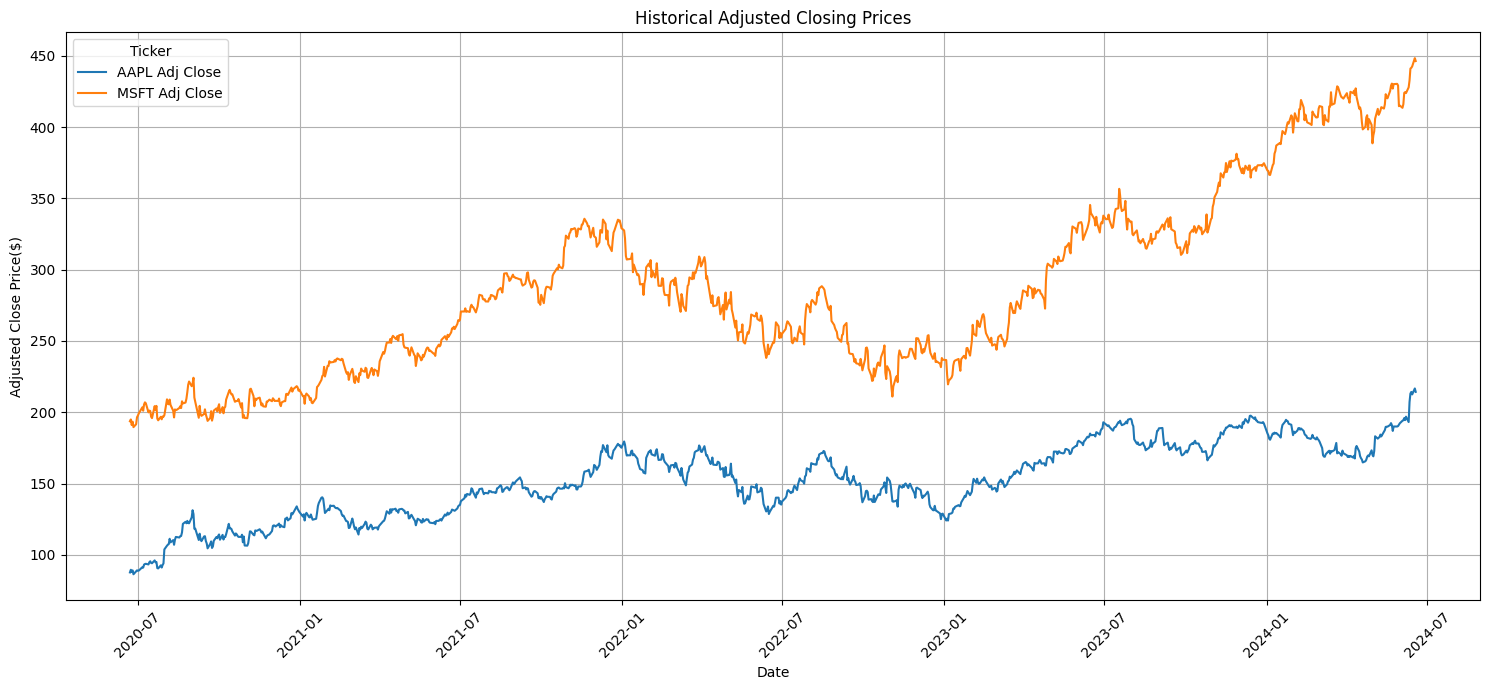

In [23]:
plt.figure(figsize=(15, 7))
sns.lineplot(x='Date', y='Stock Value', hue='Ticker', data=data_long)
plt.title('Historical Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

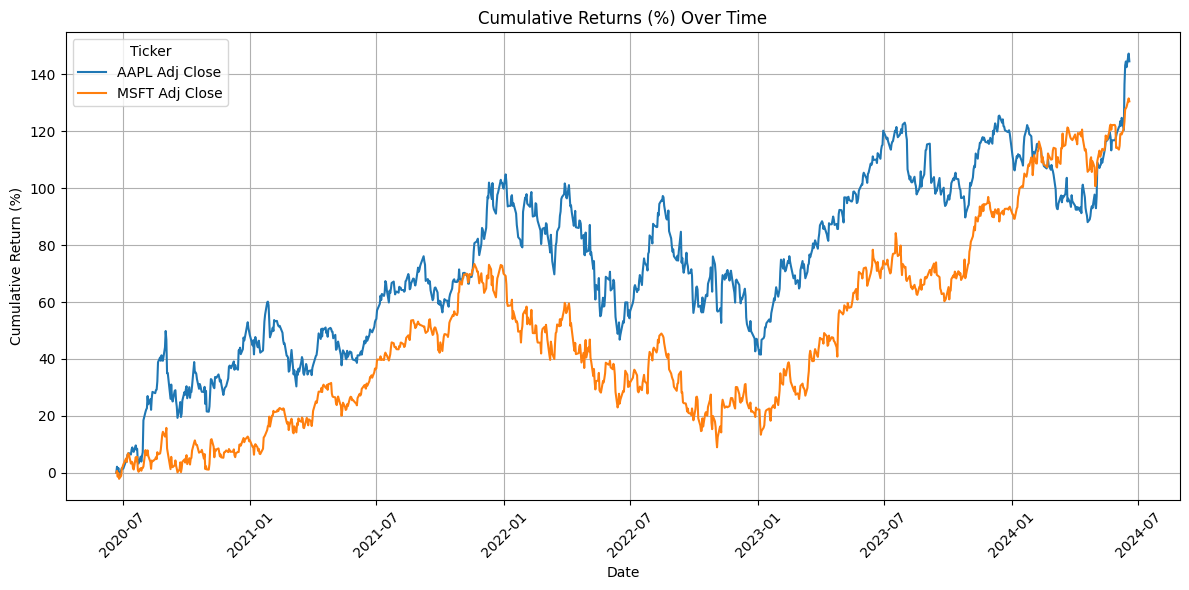

In [25]:
# Calculate cumulative returns
returns = (data[['AAPL Adj Close', 'MSFT Adj Close']] / data[['AAPL Adj Close', 'MSFT Adj Close']].iloc[0] - 1) * 100

# Reset index for plotting
returns_reset_index = returns.reset_index()

# Melt the DataFrame to have proper columns for Seaborn
returns_melted = returns_reset_index.melt(id_vars='Date', value_vars=['AAPL Adj Close', 'MSFT Adj Close'], var_name='Ticker', value_name='Cumulative Return (%)')

# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cumulative Return (%)', hue='Ticker', data=returns_melted)
plt.title('Cumulative Returns (%) Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


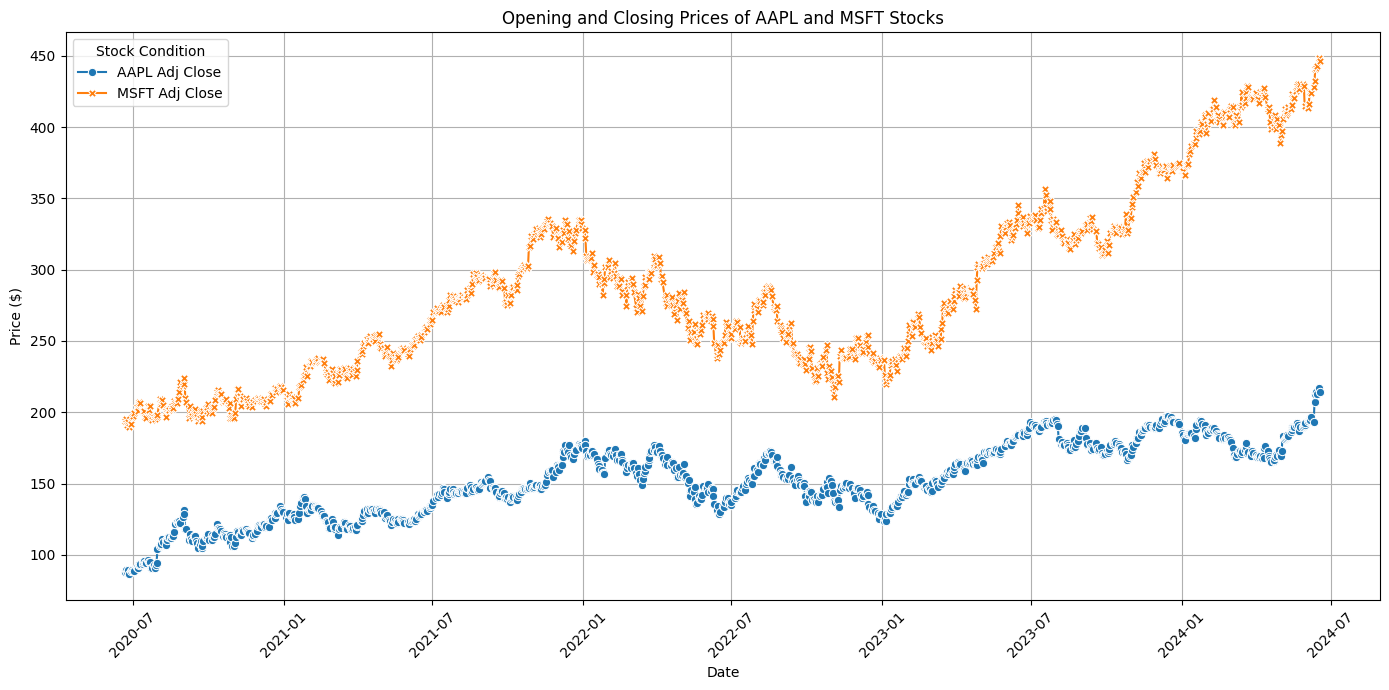

In [29]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Stock Value', hue='Ticker', style='Ticker', markers=True, dashes=False, data=data_long)
plt.title('Opening and Closing Prices of AAPL and MSFT Stocks')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.legend(title='Stock Condition')
plt.grid(True)
plt.tight_layout()
plt.show()

### CONCLUSION

#### From the above graphs we can cleary see the growth of stocks of Apple and Microsoft in the last 4 years
##### There was a increase of approx 140% of commulative returns in te last 4 years
##### The opening and closing price of these stocks have increased in the past 4 years
##### The closing prices have seen an increase of around 100$ for Apple and 250$ for Micosoft
##### The above data clearly justifies how financially strong these stocks are.

###### We saw a huge decline in closing price of Microsoft between 2022-01 to 2023-01 but it gained huge success in the long run